In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = pd.read_csv("Insurance.csv", nrows=1).columns
df=pd.read_csv("Insurance.csv", usecols=cols[1:], sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
df.head()

C:\Users\Sneha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,6,10,11,13,14,16,17,18,20,21,22,23,24,25,26,28,33,45,49,51,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,918.0,A,36.0,3000.0,14.4,UnSecured,46.0,8.0,132.0,H,...,N,16.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
1,903.0,A,120.0,21000.0,7.9,secured,16.0,3.0,288.0,H,...,N,99.0,Life & Critical Illn,1.0,748.0,LIFE & CRITICAL ILLNESS,LCI,0.0,0.0,1.0
2,1060.0,X,78.0,7200.0,7.9,secured,17.0,3.0,276.0,H,...,N,50.0,Joint,1.0,719.0,LASCI JOINT,Joint,0.0,1.0,0.0
3,839.0,B,60.0,8000.0,16.9,UnSecured,47.0,8.0,48.0,R,...,N,99.0,Life & Critical Illn,1.0,748.0,LIFE & CRITICAL ILLNESS,LCI,0.0,0.0,1.0
4,1057.0,X,60.0,7650.0,7.4,UnSecured,55.0,10.0,156.0,H,...,N,99.0,Single,1.0,718.0,LASCI,Single,1.0,0.0,0.0


In [3]:
# Null value check
df.isnull().sum()

Credit_Score                           3
Final_Grade                            3
Term                                   3
Net_Advance                            3
APR                                    3
Loan_Type                              3
Mosaic                                 3
Mosaic_Class                           3
Time_at_Address                        3
Residential_Status                     3
Telephone_Indicator                    3
Number_of_Dependants                   3
Marital_Status                         3
Gender                                 3
Time_in_Employment                     3
Employment_Status                      3
Full_Part_Time_Empl_Ind                3
Perm_Temp_Empl_Ind                     3
Income_Range                           3
Current_Account                        3
ACCESS_Card                            3
VISA_Card                              3
American_Express                       3
Diners_Card                            3
Cheque_Guarantee

In [4]:
# Target Guided Ordinal Imputation for categorical variables
df['Insurance_Description'].fillna("Missing", inplace=True)
df['prdt_desc'].fillna("Missing", inplace=True)
df['category'].fillna("Missing", inplace=True)

# Mean Imputation
df['code'].fillna(df['code'].mean(), inplace=True)

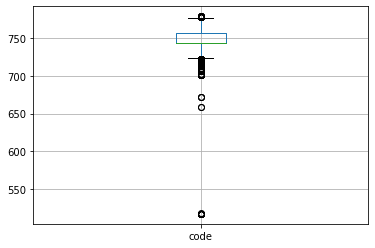

In [5]:
df.boxplot(column='code') # less outliers than Median imputation

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16383 entries, 0 to 16382
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Credit_Score                      16383 non-null  float64
 1   Final_Grade                       16383 non-null  object 
 2   Term                              16383 non-null  float64
 3   Net_Advance                       16383 non-null  float64
 4   APR                               16383 non-null  float64
 5   Loan_Type                         16383 non-null  object 
 6   Mosaic                            16383 non-null  float64
 7   Mosaic_Class                      16383 non-null  float64
 8   Time_at_Address                   16383 non-null  float64
 9   Residential_Status                16383 non-null  object 
 10  Telephone_Indicator               16383 non-null  object 
 11  Number_of_Dependants              16383 non-null  float64
 12  Mari

In [8]:
df.describe()

,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,...,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000
mean,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,4.408716,...,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,1.668857,...,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,18.398765,0.485976,0.263032,0.325402
min,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,3.000000,...,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,743.303243,0.000000,0.000000,0.000000
50%,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,5.000000,...,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,743.303243,0.000000,0.000000,0.000000
75%,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,6.000000,...,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,757.000000,1.000000,0.000000,0.000000
max,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,6.000000,...,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


In [9]:
# Finding unique values
df.nunique()

Credit_Score                          613
Final_Grade                            10
Term                                  103
Net_Advance                          1172
APR                                   311
Loan_Type                               2
Mosaic                                 63
Mosaic_Class                           12
Time_at_Address                       526
Residential_Status                      4
Telephone_Indicator                     2
Number_of_Dependants                    9
Marital_Status                          4
Gender                                  2
Time_in_Employment                    469
Employment_Status                       9
Full_Part_Time_Empl_Ind                 2
Perm_Temp_Empl_Ind                      2
Income_Range                            7
Current_Account                         2
ACCESS_Card                             2
VISA_Card                               2
American_Express                        2
Diners_Card                       

In [10]:
df.select_dtypes(include='object')

,Final_Grade,Loan_Type,Residential_Status,Telephone_Indicator,Marital_Status,Gender,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Current_Account,...,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Value_of_Property,Payment_Method,Bankruptcy_Detected__SP_,CIFAS_detected,Insurance_Description,prdt_desc,category
0,A,UnSecured,H,Y,M,M,S,F,P,TRUE,...,FALSE,TRUE,TRUE,"1,78,000.00",D,N,N,Missing,Missing,Missing
1,A,secured,H,Y,S,F,R,P,P,TRUE,...,FALSE,TRUE,FALSE,"1,80,000.00",D,N,N,Life & Critical Illn,LIFE & CRITICAL ILLNESS,LCI
2,X,secured,H,Y,M,M,P,F,P,TRUE,...,FALSE,TRUE,FALSE,"1,99,000.00",D,N,N,Joint,LASCI JOINT,Joint
3,B,UnSecured,R,Y,M,M,G,F,P,TRUE,...,FALSE,TRUE,FALSE,"1,20,000.00",D,N,N,Life & Critical Illn,LIFE & CRITICAL ILLNESS,LCI
4,X,UnSecured,H,Y,M,M,S,F,P,TRUE,...,FALSE,TRUE,FALSE,"1,80,000.00",D,N,N,Single,LASCI,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,X,UnSecured,H,Y,S,F,P,F,P,TRUE,...,FALSE,FALS,TRUE,"4,65,000.00",D,N,N,Missing,Missing,Missing
16379,A,UnSecured,H,Y,S,M,P,F,P,TRUE,...,FALSE,FALS,FALSE,"1,35,000.00",D,N,N,Missing,Missing,Missing
16380,C,UnSecured,H,N,S,F,P,F,P,TRUE,...,FALSE,TRUE,FALSE,"2,45,000.00",D,N,N,LASU,LASU,Single
16381,D,UnSecured,H,Y,M,F,P,F,P,TRUE,...,FALSE,TRUE,TRUE,"2,30,000.00",D,N,N,LASU,LASU,Single


In [11]:
df.category.value_counts()

Missing    6922
Single     6264
LCI        1972
JOINT       647
Joint       578
Name: category, dtype: int64

In [12]:
df['category']= df['category'].apply(lambda x : "JOINT" if str(x)=='Joint' else x)

In [13]:
df1= df.copy()

In [14]:
df1['category']= df1['category'].apply(lambda x : "JOINT" if str(x)=='Joint' else x)

In [15]:
df1.category.value_counts()

Missing    6922
Single     6264
LCI        1972
JOINT      1225
Name: category, dtype: int64

In [16]:
# converting categorical data to numeric
Payment_Method= pd.get_dummies(df1['Payment_Method'], drop_first=True)
Employment_Status= pd.get_dummies(df1['Employment_Status'], drop_first=True)
Full_Part_Time_Empl_Ind= pd.get_dummies(df1['Full_Part_Time_Empl_Ind'], drop_first=True)
Perm_Temp_Empl_Ind= pd.get_dummies(df1['Perm_Temp_Empl_Ind'], drop_first=True)
Gender= pd.get_dummies(df1['Gender'], drop_first=True)
Marital_Status= pd.get_dummies(df1['Marital_Status'], drop_first=True)
Residential_Status= pd.get_dummies(df1['Residential_Status'], drop_first=True)
Loan_Type= pd.get_dummies(df1['Loan_Type'], drop_first=True)
Final_Grade= pd.get_dummies(df1['Final_Grade'], drop_first=True)

In [17]:
# Renaming column names
Payment_Method.columns=['Payment_Method_D','Payment_Method_S']
Employment_Status.columns=['Emp_Sts_G','Emp_Sts_H','Emp_Sts_M','Emp_Sts_P','Emp_Sts_R','Emp_Sts_S','Emp_Sts_T','Emp_Sts_U']
Full_Part_Time_Empl_Ind.columns=['Part_Time_Ind']
Perm_Temp_Empl_Ind.columns=['Temporary_Emp']
Gender.columns=['Male']
Marital_Status.columns=['Married','Single','Widow']
Residential_Status.columns=['Residential_L','Residential_R','Residential_T']
Loan_Type.columns=['Loan_type_Secured']
Final_Grade.columns=['Grade_B','Grade_C','Grade_D','Grade_E','Grade_F','Grade_O','Grade_R','Grade_S','Grade_X']

In [18]:
df1= pd.concat([Payment_Method,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,
                Gender,Marital_Status,Residential_Status,Loan_Type,Final_Grade,df1], axis=1)

In [19]:
df1.drop(['Payment_Method','Employment_Status','Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind',
          'Gender','Marital_Status','Residential_Status','Loan_Type','Final_Grade','Insurance_Description',
         'prdt_desc','PPI_SINGLE','PPI_JOINT','PPI_LCI'], axis=1, inplace= True)

In [20]:
# Removing extra spaces from data
df1['category']=df1['category'].str.strip()
df1['Other_Credit_Store_Card']=df1['Other_Credit_Store_Card'].str.strip()
df1['ACCESS_Card']=df1['ACCESS_Card'].str.strip()
df1['VISA_Card']=df1['VISA_Card'].str.strip()
df1['American_Express']=df1['American_Express'].str.strip()
df1['Diners_Card']=df1['Diners_Card'].str.strip()

In [21]:
# Replacing the cat. data which has occured in multiple places
df1.replace({"FALSE": 0, "FALS": 0, "TRUE": 1}, inplace = True)
df1.replace({"N": 0, "Y": 1, "T": 2}, inplace = True)
df1.replace({"Missing":0, "LCI":1, "Single":2, "JOINT":3}, inplace = True)
df1.head(2)

,Payment_Method_D,Payment_Method_S,Emp_Sts_G,Emp_Sts_H,Emp_Sts_M,Emp_Sts_P,Emp_Sts_R,Emp_Sts_S,Emp_Sts_T,Emp_Sts_U,...,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,PPI,code,category
0,1,0,0,0,0,0,0,1,0,0,...,10.0,0,1.0,18.0,6.0,0,16.0,0.0,743.303243,0
1,1,0,0,0,0,0,1,0,0,0,...,22.0,0,0.0,203.0,8.0,0,99.0,1.0,748.000000,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16383 entries, 0 to 16382
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Payment_Method_D                  16383 non-null  uint8  
 1   Payment_Method_S                  16383 non-null  uint8  
 2   Emp_Sts_G                         16383 non-null  uint8  
 3   Emp_Sts_H                         16383 non-null  uint8  
 4   Emp_Sts_M                         16383 non-null  uint8  
 5   Emp_Sts_P                         16383 non-null  uint8  
 6   Emp_Sts_R                         16383 non-null  uint8  
 7   Emp_Sts_S                         16383 non-null  uint8  
 8   Emp_Sts_T                         16383 non-null  uint8  
 9   Emp_Sts_U                         16383 non-null  uint8  
 10  Part_Time_Ind                     16383 non-null  uint8  
 11  Temporary_Emp                     16383 non-null  uint8  
 12  Male

In [23]:
df1.Bankruptcy_Detected__SP_

0        0
1        0
2        0
3        0
4        0
        ..
16378    0
16379    0
16380    0
16381    0
16382    0
Name: Bankruptcy_Detected__SP_, Length: 16383, dtype: int64

In [24]:
# Changing data type to Float64
df1['Value_of_Property']=pd.to_numeric(df1['Value_of_Property'].str.replace(',', ''))

In [25]:
df1['Value_of_Property'].dtypes

dtype('float64')

In [26]:
df1.nunique().sort_values(ascending=False)

Total_Outstanding_Balances          14744
Outstanding_Mortgage_Bal             8162
Bureau_Data___Monthly_Other_Co_R     2230
Net_Advance                          1172
Total_outstanding_balance___excl      749
                                    ...  
Grade_F                                 2
Grade_E                                 2
Grade_D                                 2
Grade_C                                 2
Payment_Method_D                        2
Length: 73, dtype: int64

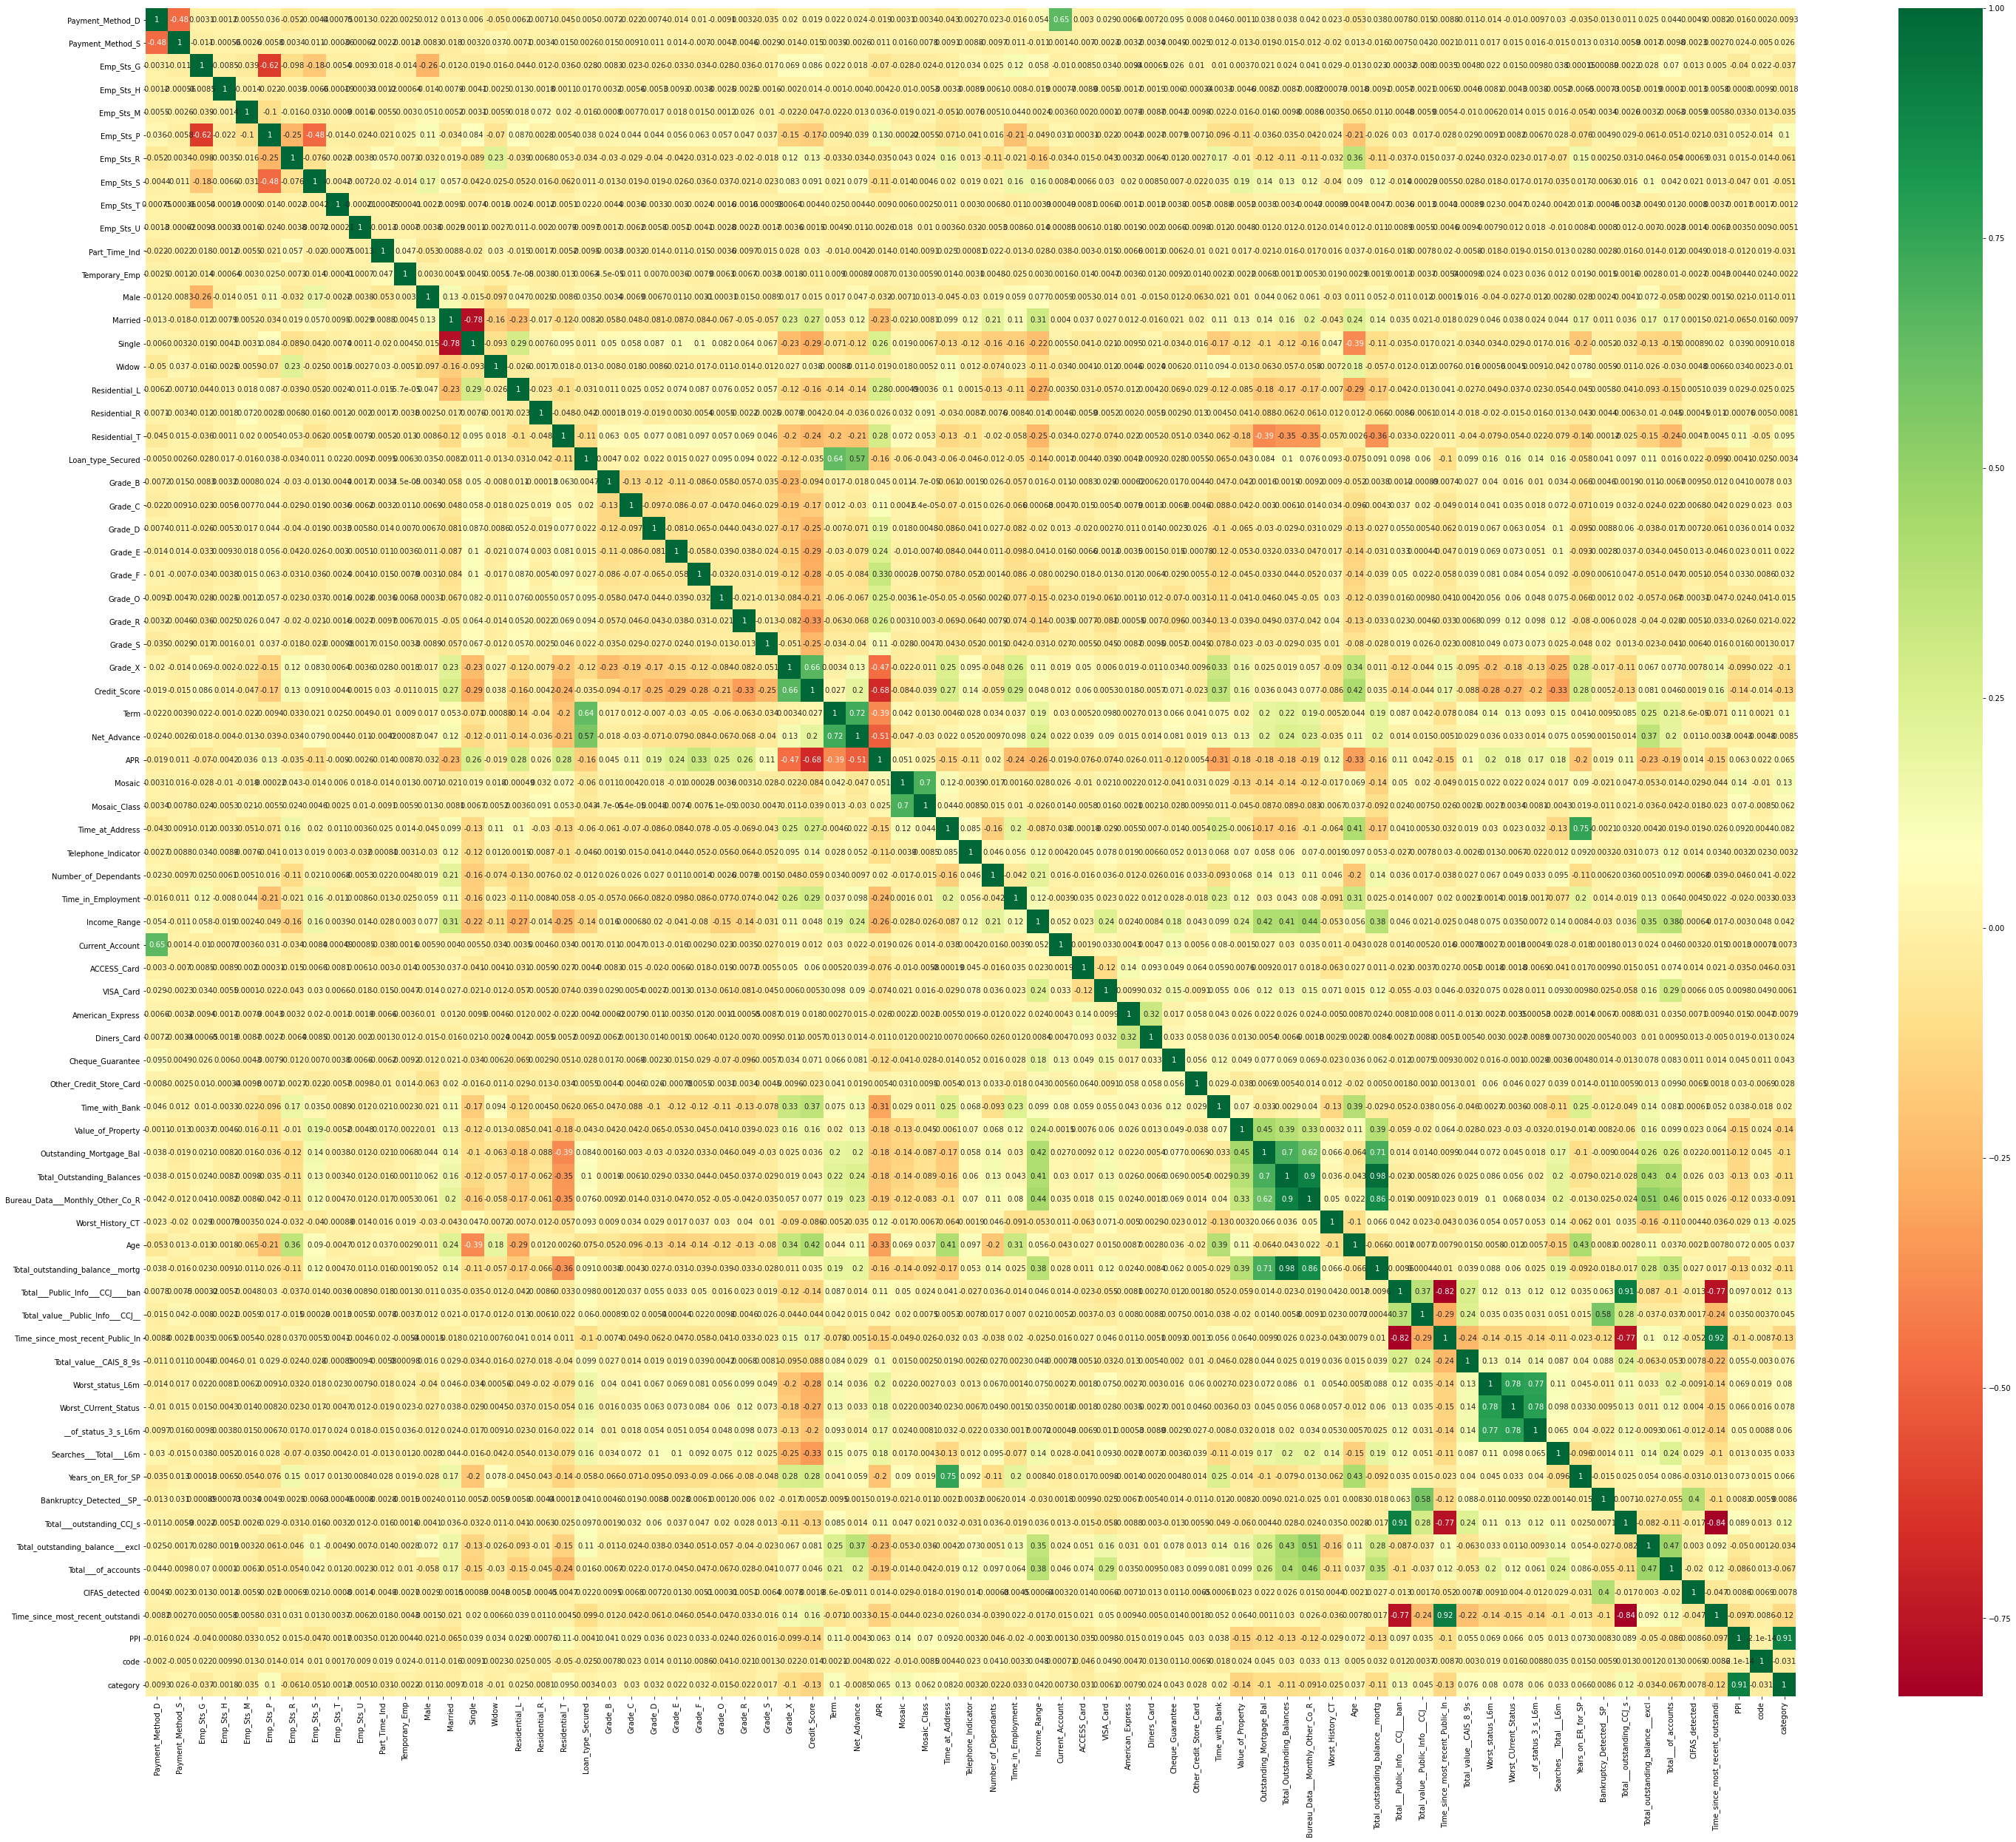

In [27]:
plt.figure(figsize=(50,42))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')

In [28]:
# Assigning the Independent and dependent variables
X= df1.drop(['PPI'], axis=1)
y= df1['PPI']

### Feature Selection

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

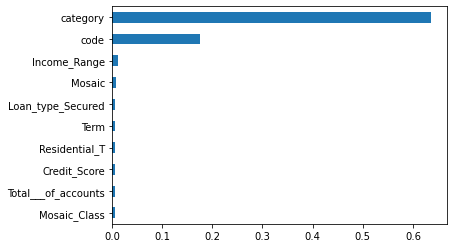

In [30]:
feature= pd.Series(model.feature_importances_, index=X.columns)
feature.nlargest(10).sort_values().plot(kind='barh')
plt.show()

In [31]:
from sklearn.feature_selection import mutual_info_classif
mi= mutual_info_classif(X,y)
data=pd.Series(mi, index=X.columns)
data.nlargest(10).sort_values(ascending=False)

category                      0.682432
code                          0.662231
Income_Range                  0.023075
Mosaic                        0.019779
Value_of_Property             0.019705
Credit_Score                  0.019023
Mosaic_Class                  0.018483
Net_Advance                   0.014640
Total_Outstanding_Balances    0.013077
Total_value__CAIS_8_9s        0.012842
dtype: float64

### Drawing data Insights

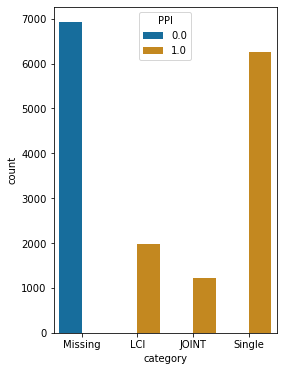

In [32]:
plt.subplots(figsize=(4,6))
sns.countplot(x= 'category',hue = 'PPI',data = df,palette='colorblind')

#### There are around 6923 customer records who do not have PPI products.

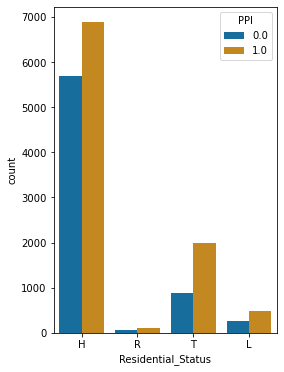

In [33]:
plt.subplots(figsize=(4,6))
sns.countplot(x= 'Residential_Status',hue = 'PPI',data = df,palette='colorblind')

#### Most of the customers with resedential status 'H' have not enrolled for PPI products.

In [34]:
df1['Age']= pd.cut(df1['Age'],
                           bins=[0,10,20,30,40,50,60,70,80],
                           labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70',
                                   '70-80'])

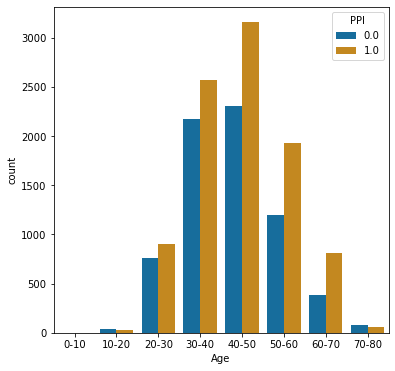

In [35]:
plt.subplots(figsize=(6,6))
sns.countplot(x= 'Age',hue = 'PPI',data = df1,palette='colorblind')

#### Majority of the customers with age group between 30-50 years have not enrolled for any PPI products.

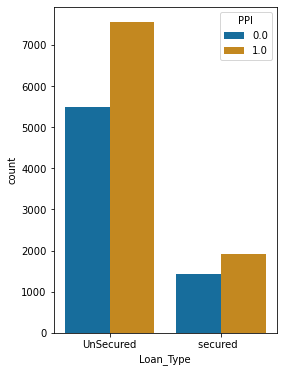

In [36]:
plt.subplots(figsize=(4,6))
sns.countplot(x= 'Loan_Type',hue = 'PPI',data = df,palette='colorblind')

#### Majority of People with 'Unsecured' loan type have not enrolled for PPI products.

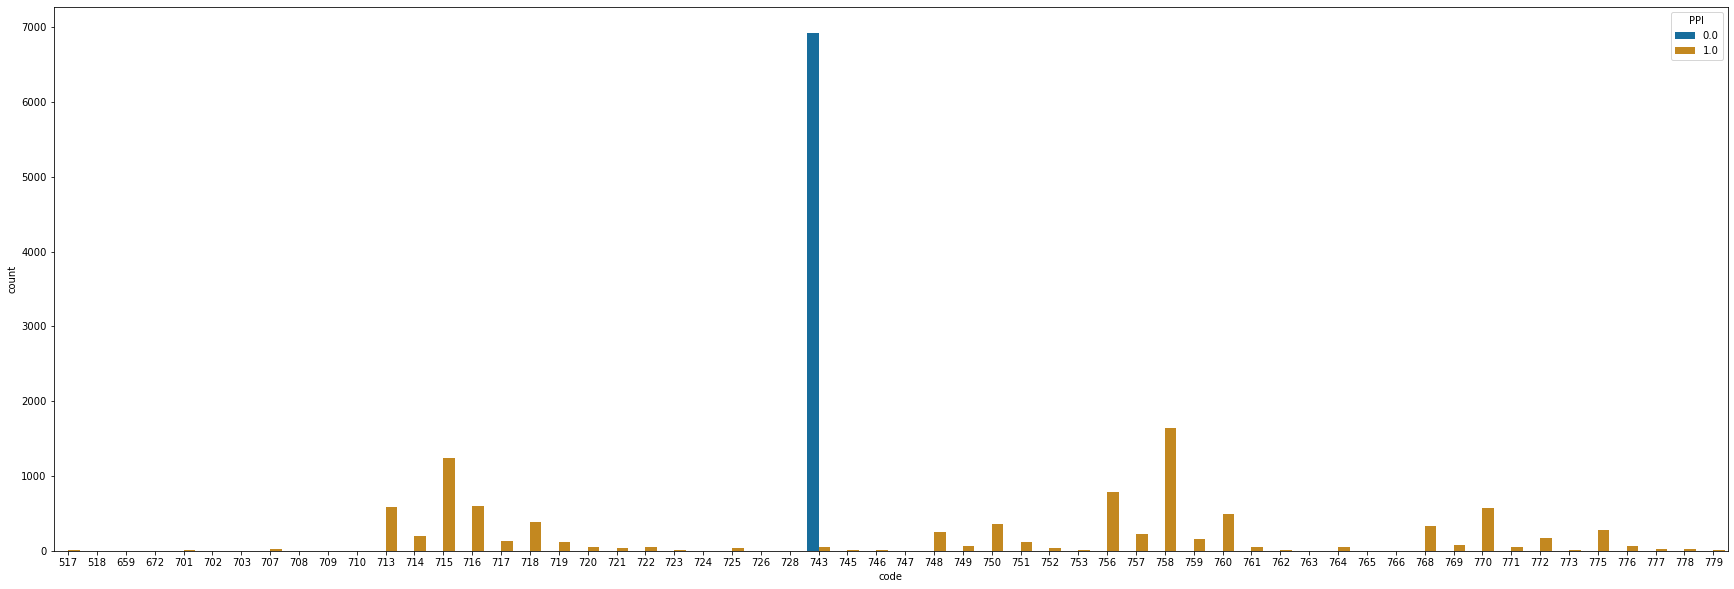

In [37]:
df1['code']=df1['code'].astype('int64')
plt.subplots(figsize=(30,10))
sns.countplot(x= 'code',hue = 'PPI',data = df1,palette='colorblind')

#### Code- 743 have not enrolled for any PPI products.

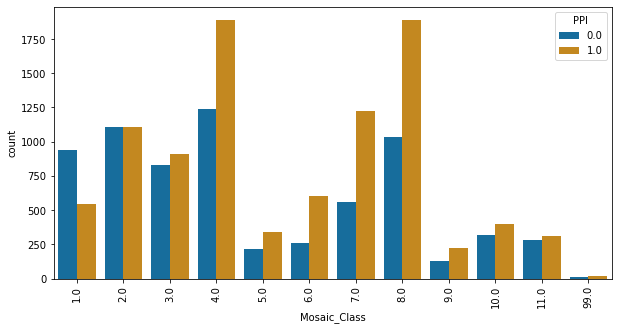

In [38]:
fig, ax=plt.subplots(figsize=(10,5))
ax.set_xticklabels(df1.Mosaic_Class, rotation=90)
sns.countplot(x= 'Mosaic_Class',hue = 'PPI',data = df1,palette='colorblind')

#### people with Mosaic_Class=2 and 4 have mostly not enrolled for PPI. 

In [39]:
df1['Mosaic']= pd.cut(df1['Mosaic'],
                           bins=[0,10,20,30,40,50,60,70,80,90,100],
                           labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70',
                                   '70-80','80-90','90-100'])

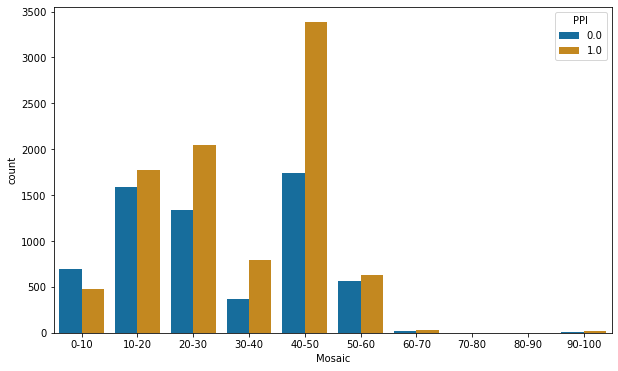

In [40]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x= 'Mosaic',hue = 'PPI',data = df1,palette='colorblind')

#### People with Mosaic range between 10-20 and 40-50 have majorly not enrolled for PPI

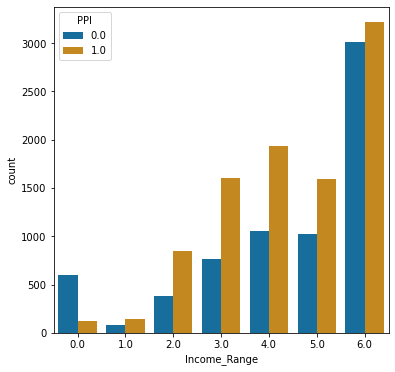

In [41]:
plt.subplots(figsize=(6,6))
sns.countplot(x= 'Income_Range',hue = 'PPI',data = df1,palette='colorblind')

#### People with high income range (greater than 6) have taken less PPI products

In [42]:
import sys
df1['Credit_Score']= pd.cut(df1['Credit_Score'],
                           bins=[0,350,450,550,650,750,850,950,1050,1150,sys.maxsize],
                           labels=['0-350','350-450','450-550','550-650','650-750','750-850','850-950',
                                   '950-1050','1050-1150','1150+'])

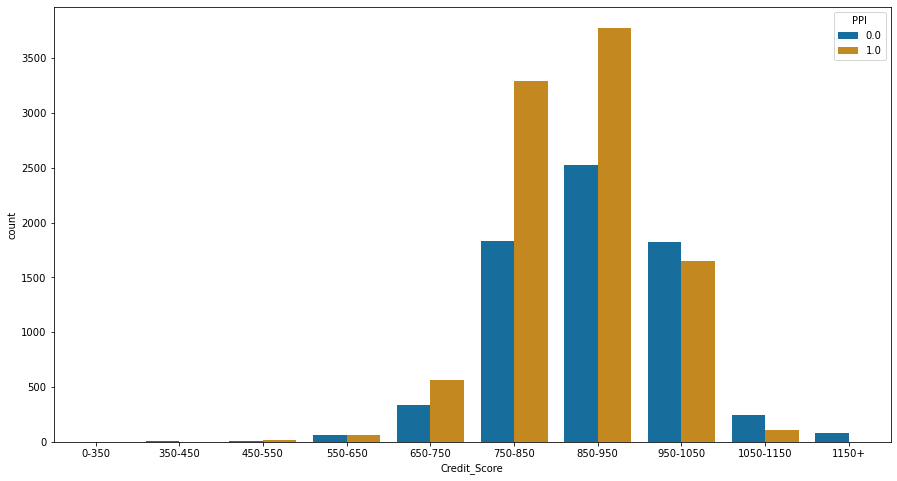

In [43]:
plt.subplots(figsize=(15,8))
sns.countplot(x= 'Credit_Score',hue = 'PPI',data = df1,palette='colorblind')

#### Less PPI products have been taken by people with credit scores between 850-950

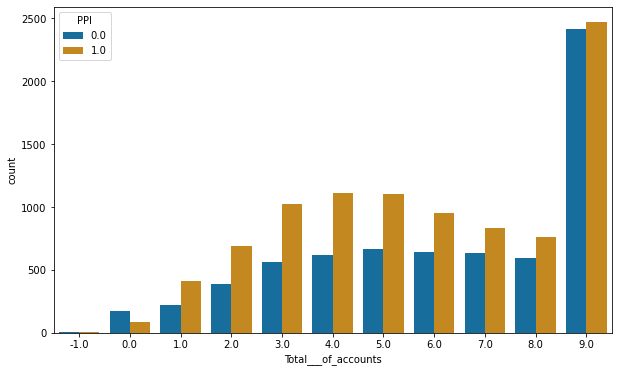

In [44]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x= 'Total___of_accounts',hue = 'PPI',data = df1,palette='colorblind')

#### Less PPI products have been taken by people who has Total accounts=9

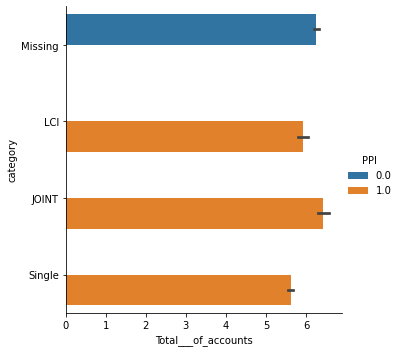

In [45]:
sns.catplot(x="Total___of_accounts", y="category", hue="PPI", kind="bar", data=df)

#### People with less PPI products w.r.t Total accounts should be targetted with JOINT PPI product.

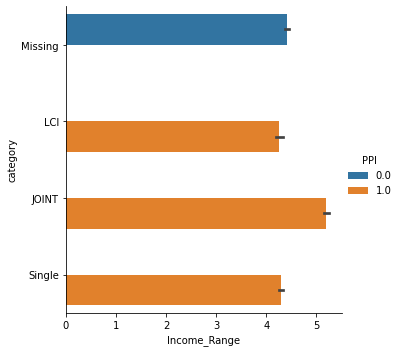

In [46]:
sns.catplot(x="Income_Range", y="category", hue="PPI", kind="bar", data=df)

#### People with less PPI products w.r.t Income range should be targetted with JOINT PPI product.

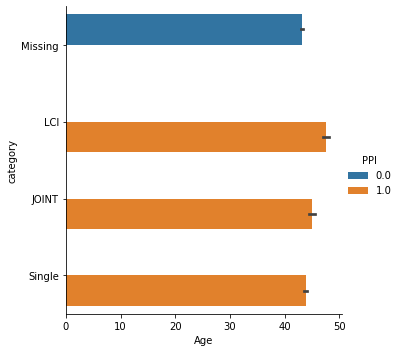

In [47]:
sns.catplot(x="Age", y="category", hue="PPI", kind="bar", data=df)

#### People with less PPI products w.r.t Age should be targetted with LCI PPI product.

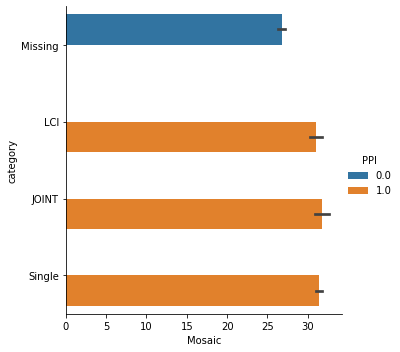

In [48]:
sns.catplot(x="Mosaic", y="category", hue="PPI", kind="bar", data=df)

#### People with less PPI products w.r.t Mosaic should be targetted with JOINT PPI product.

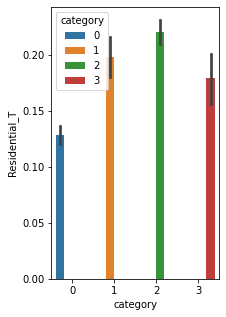

In [50]:
plt.figure(figsize=(3,5))
sns.barplot(x=df1['category'], y=df1['Residential_T'], hue=df1['category'])

#### People with less PPI products w.r.t Residential status='T' should be targetted with SINGLE PPI product.

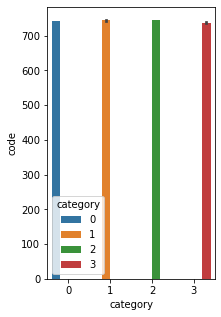

In [72]:
plt.figure(figsize=(3,5))
sns.barplot(x=df1['category'], y=df1['code'], hue=df1['category'])

#### People with less PPI products w.r.t Code should be targetted with LCI PPI product.

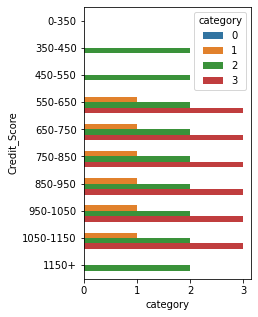

In [73]:
plt.figure(figsize=(3,5))
sns.barplot(x=df1['category'], y=df1['Credit_Score'], hue=df1['category'])

#### People with less PPI products w.r.t Credit Score should be targetted with JOINT PPI product.

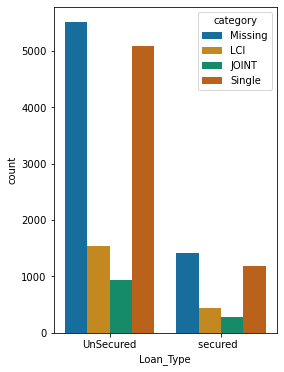

In [79]:
plt.subplots(figsize=(4,6))
sns.countplot(x= 'Loan_Type',hue = 'category',data = df,palette='colorblind')

#### People with less PPI products w.r.t Loan_type should be targetted with SINGLE PPI product.